#Proyek Analisis Data : Bike Sharing Dataset


*   Nama : Sisilia Dwi Febrianti
*   Email : sisiliadf24@gmail.com
*   ID Dicoding : sisiliaadf






#Menentukan Pertanyaan Bisnis


1.   Bagaimana tren penyewaan sepeda di setiap bulannya dari tahun ke tahun?
2. Bagaimana pola distribusi penyewaan sepeda dalam 24 jam dan kapan waktu puncak penyewaan biasanya terjadi?
3. Bagaimana perbedaan jumlah penyewaan sepeda saat hari kerja dan hari libur?
4. Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?
5. Pada musim apa jumlah sepeda yang disewakan paling banyak?




#Import semua packages/library yang digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling


##Gathering Data




In [2]:
#Membaca file 'day.csv'
bikeday_df = pd.read_csv("day.csv")
bikeday_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#Membaca file 'hour.csv'
bikehour_df = pd.read_csv("hour.csv")
bikehour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Assessing Data

In [4]:
#Menampilkan informasi dataframe bikeday_df dan bikehour_df
bikeday_df.info()
bikehour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot



*   Terdapat kesalahan tipe data pada atribut 'dteday' yang merupakan tanggal kejadian, namun tipe datanya 'object'
*   Semua kolom memiliki jumlah 'non-null' yang sama, artinya isi dataset ini lengkap, tidak ada missing value



In [5]:
#Cek missing value pada dataframe bikeday untuk memastikan kembali kesesuaian dengan informasi diatas
bikeday_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Semua kolom menunjukkan angka 0, artinya tidak ada missing value

In [6]:
#Cek missing value pada dataframe bikehour untuk memastikan kembali kesesuaian dengan informasi diatas
bikehour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Semua kolom menunjukkan angka 0, artinya tidak ada missing value

In [9]:
#Mengecek apakah ada data duplikat pada dataframe
print("Jumlah duplikasi pada dataframe 'bikeday': ", bikeday_df.duplicated().sum())
print("Jumlah duplikasi pada dataframe 'bikehour': ", bikehour_df.duplicated().sum())

Jumlah duplikasi pada dataframe 'bikeday':  0
Jumlah duplikasi pada dataframe 'bikehour':  0


Kedua dataframe tersebut menunjukkan angka 0, artinya tidak ada data yang duplikat pada dataframe ini

In [10]:
#Melihat ringkasan statistik dataframe bikeday
bikeday_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
#Melihat ringkasan statistik dataframe bikehour
bikehour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan ringkasan statistik tersebut, tidak ada kesalahan pada data. Namun ada beberapa kolom yang isinya sulit dimengerti


*   Kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' datanya diwakili dengan angka karena telah mengalami proses encoding sehingga perlu diubah menjadi tipe data kategori dulu supaya bisa diisi dengan nilai yang sebenarnya, sehingga nantinya dapat mudah dipahami




##Cleaning Data

In [12]:
#Mengubah tipe data kolom 'dteday' dari object menjadi integer
bikeday_df['dteday'] = pd.to_datetime(bikeday_df['dteday'])
bikehour_df['dteday'] = pd.to_datetime(bikehour_df['dteday'])

In [13]:
#Mengubah tipe data kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' dari int menjadi category
kolom = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit']

for df in [bikeday_df, bikehour_df]:
    df[kolom] = df[kolom].astype('category')

In [14]:
# Mengubah isi kolom kategori yang mulanya diwakili dengan angka, diganti menjadi nilai yang sebenarnya
bikeday_df.replace({
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: '2011', 1: '2012'},
    'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'holiday': {0: "Not Holiday", 1: "Holiday"},
    'weekday': {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"},
    'workingday': {0: "Holiday", 1: "Working Day"},
    'weathersit': {1: 'Clear', 2: 'Mist', 3: 'Light_snow', 4: 'Heavy_rain'}
}, inplace=True)  #

# Mengubah isi kolom kategori pada bikehour_df
bikehour_df.replace({
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'yr': {0: '2011', 1: '2012'},
    'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'holiday': {0: "Not Holiday", 1: "Holiday"},
    'weekday': {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"},
    'workingday': {0: "Holiday", 1: "Working Day"},
    'weathersit': {1: 'Clear', 2: 'Mist', 3: 'Light_snow', 4: 'Heavy_rain'}
}, inplace=True)

<ipython-input-14-9aa76a7f247c>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bikeday_df.replace({
<ipython-input-14-9aa76a7f247c>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bikeday_df.replace({
<ipython-input-14-9aa76a7f247c>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  bikeday_df.replace({
<ipython-input-14-9aa76a7f247c>:2: FutureWarning:

In [15]:
bikeday_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,Not Holiday,Saturday,Holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Not Holiday,Sunday,Holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Not Holiday,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Not Holiday,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Not Holiday,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
bikehour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Not Holiday,Saturday,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,Not Holiday,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,Not Holiday,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,Not Holiday,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,Not Holiday,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
bikeday_df.info()
bikehour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Hasil dari proses cleaning adatset:

*   Tipe data pada kolom 'dteday' berhasil diubah menjadi datetime
*   Tipe data pada kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit' berhasil diubah menjadi category
*   Isi kolom kategorikal yang awalnya diwakili dengan angka juga berhasil diganti dengan nilai yang sebenarnya






#Exploratory Data Analysis (EDA)

##Eksplor bikeday_df

In [18]:
#Melihat ringkasan statistik semua kolom pada bikeday_df
bikeday_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,Not Holiday,Sunday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan informasi diatas, dapat diketahui bahwa jumlah rata-rata pelanggan yang menyewa sepeda pada 2011-2012 adalah 4504 orang. Selain itu, jumlah pelanggan terbanyak yang menyewa sepeda yaitu saat keadaan cuaca cerah atau 'Clear'

In [20]:
# Melihat total sepeda yang disewakan per bulan di tahun 2011
bikeday_2011 = bikeday_df[bikeday_df['dteday'].dt.year == 2011]

# Mengelompokkan data berdasarkan bulan dan menghitung total sepeda yang disewakan
monthly_counts = bikeday_2011.groupby(bikeday_2011['dteday'].dt.month)['cnt'].sum().reset_index()

# Mengubah nama kolom
monthly_counts.columns = ['Bulan', 'Total_Sepeda']
monthly_counts

,Bulan,Total_Sepeda
0,1,38189
1,2,48215
2,3,64045
3,4,94870
4,5,135821
5,6,143512
6,7,141341
7,8,136691
8,9,127418
9,10,123511


Berdasarkan informasi di atas, pada tahun 2011 total penyewaan sepeda terbanyak terjadi di bulan 6 (Juni)

In [21]:
# Melihat total sepeda yang disewakan per bulan di tahun 2012
bikeday_2012 = bikeday_df[bikeday_df['dteday'].dt.year == 2012]

# Mengelompokkan data berdasarkan bulan dan menghitung total sepeda yang disewakan
monthly_counts = bikeday_2012.groupby(bikeday_2012['dteday'].dt.month)['cnt'].sum().reset_index()

# Mengubah nama kolom
monthly_counts.columns = ['Bulan', 'Total_Sepeda']
monthly_counts

,Bulan,Total_Sepeda
0,1,96744
1,2,103137
2,3,164875
3,4,174224
4,5,195865
5,6,202830
6,7,203607
7,8,214503
8,9,218573
9,10,198841


Berdasarkan informasi diatas, pada tahun 2012 total penyewaan sepeda terbanyak terjadi di bulan 9 (September)

In [22]:
#Melihat berapa banyak sepeda yang disewakan saat Holiday dan Working day
bikeday_df.groupby(by="workingday").cnt.sum()

<ipython-input-22-497730414a1e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikeday_df.groupby(by="workingday").cnt.sum()


,cnt
workingday,
Holiday,1000269
Working Day,2292410


Berdasarkan informasi diatas, dapat diketahui bahwa jumlah pelanggan saat hari kerja lebih banyak dibanding hari libur

In [24]:
# Menghitung parameter korelasi antara suhu dan jumlah sepeda yang disewakan
correlation = bikeday_df[['temp', 'cnt']].corr()
correlation

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


Berdasarkan informasi diatas, parameter korelasi adalah nilai positif (0,6) yang menunjukkan korelasi yang bersesuaian

In [26]:
#Melihat total penyewaan sepeda berdasarkan musim
bikeday_df.groupby(by="season").agg({
    "cnt": "sum",
})

<ipython-input-26-ac6c965f108c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikeday_df.groupby(by="season").agg({


,cnt
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


Berdasarkan informasi diatas, dapat diketahui bahwa jumlah penyewaan sepeda paling banyak terjadi pada musim 'Fall'

##Eksplor bikehour_df

In [27]:
#Melihat ringkasan statistik semua kolom pada bikehour_df
bikehour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,Not Holiday,Saturday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan ringkasan tersebut, dapat diketahui bahwa kolom 'hr' memiliki nilai minimum 0 dan nilai maksimum 23, yang artinya penyewaan sepeda dimulai dari pukul 00.00 hingga 23.59

In [28]:
#Menghitung jumlah sepeda yang disewakan berdasarkan jam
bikehour_df.groupby(by="hr").cnt.sum()

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


Berdasarkan informasi diatas, dapat diketahui jumlah penyewaan sepeda bervariasi di setiap jamnya dan mencapai puncaknya pada jam 17

#Visualizatian & Explanatory Analysis

##Pertanyaan 1 : Bagaimana tren penyewaan sepeda di setiap bulannya dari tahun ke tahun?

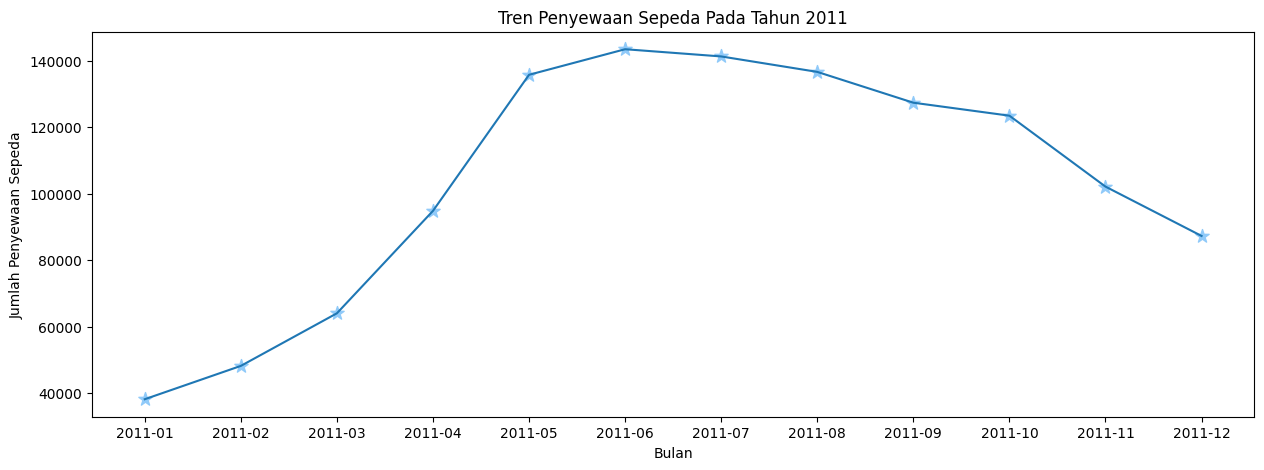

In [30]:
# Membuat line dan scatter plot untuk melihat tren penyewaan sepeda di tahun 2011
# Menyaring data untuk tahun 2011
bikeday_2011 = bikeday_df[bikeday_df['dteday'].dt.year == 2011]

# Membuat figure dengan ukuran (15, 5)
plt.figure(figsize=(15, 5))

# Menghitung jumlah penyewaan per bulan untuk tahun 2011
monthly_counts = bikeday_2011['cnt'].groupby(bikeday_2011['dteday'].dt.to_period('M')).sum()

# Membuat scatter plot untuk jumlah penyewaan per bulan, dengan warna biru dan marker '*'
plt.scatter(monthly_counts.index.astype(str), monthly_counts.values, c="#90CAF9", s=100, marker='*')

# Membuat line plot untuk jumlah penyewaan per bulan
plt.plot(monthly_counts.index.astype(str), monthly_counts.values)

# Penamaan sumbu x dan y
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.title('Tren Penyewaan Sepeda Pada Tahun 2011')
plt.show()


Berdasarkan hasil visualisasi diatas, dapat dilihat bahwa pada tahun 2011 terjadi kenaikan jumlah penyewaan sepeda dari bulan Januari hingga mencapai puncak pada bulan Juni. Namun, setelah itu terjadi penurunan hingga bulan Desember

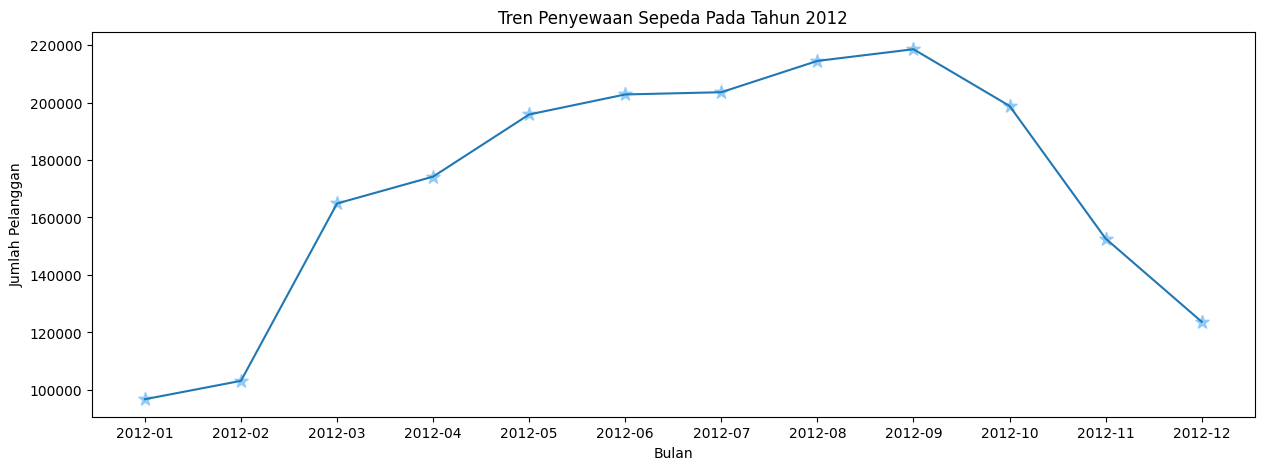

In [31]:
# Membuat line dan scatter plot untuk melihat tren penyewaan sepeda di tahun 2012
# Menyaring data untuk tahun 2012
bikeday_2012 = bikeday_df[bikeday_df['dteday'].dt.year == 2012]

# Membuat figure dengan ukuran (15, 5)
plt.figure(figsize=(15, 5))

# Menghitung jumlah penyewaan per bulan untuk tahun 2012
monthly_counts = bikeday_2012['cnt'].groupby(bikeday_2012['dteday'].dt.to_period('M')).sum()

# Membuat scatter plot untuk jumlah penyewaan per bulan, dengan warna biru dan marker '*'
plt.scatter(monthly_counts.index.astype(str), monthly_counts.values, c="#90CAF9", s=100, marker='*')

# Membuat line plot untuk jumlah penyewaan per bulan
plt.plot(monthly_counts.index.astype(str), monthly_counts.values)

# Penamaan untuk sumbu x dan y
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pelanggan')

plt.title('Tren Penyewaan Sepeda Pada Tahun 2012')
plt.show()


Berdasarkan hasil visualisasi diatas, dapat dilihat bahwa pada tahun 2012  jumlah penyewaan sepeda meningkat drastis pada bulan Maret dan mencapai puncaknya pada bulan September

##Pertanyaan 2: Bagaimana pola distribusi penyewaan sepeda dalam 24 jam dan kapan waktu puncak penyewaan biasanya terjadi?

<ipython-input-32-b23366be9d7a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hourly_counts, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a leng

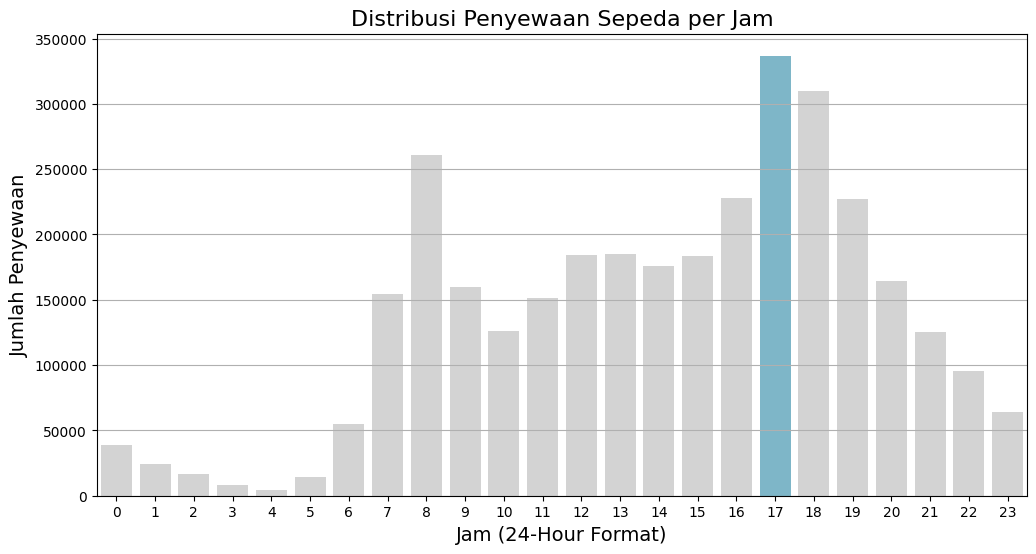

In [32]:
# Membuat diagram batang untuk melihat distribusi penyewaan sepeda selama 24 jam
# Menghitung jumlah penyewaan per jam
hourly_counts = bikehour_df.groupby('hr')['cnt'].sum().reset_index()

# Menentukan warna untuk setiap bar
colors = ["#D3D3D3"] * len(hourly_counts)
max_index = hourly_counts['cnt'].idxmax()
colors[max_index] = "#72BCD4"

# Membuat diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hourly_counts, palette=colors)

plt.xlabel('Jam (24-Hour Format)', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.title('Distribusi Penyewaan Sepeda per Jam', fontsize=16)
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()


Berdasarkan diagram batang tersebut, dapat dilihat bahwa jumlah penyewaan bervariasi di setiap jamnya. Jumlah penyewaan mencapai puncak atau paling banyak yaitu ketika jam 17, yang ditunjukkan oleh bar berwarna biru

##Pertanyaan 3: Bagaimana perbedaan jumlah penyewaan sepeda saat hari kerja dan hari libur?


<ipython-input-33-b1ee3e3f6d75>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_vs_workingday = bikeday_df.groupby('workingday')['cnt'].sum()
<ipython-input-33-b1ee3e3f6d75>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = [holiday_vs_workingday[0], holiday_vs_workingday[1]]


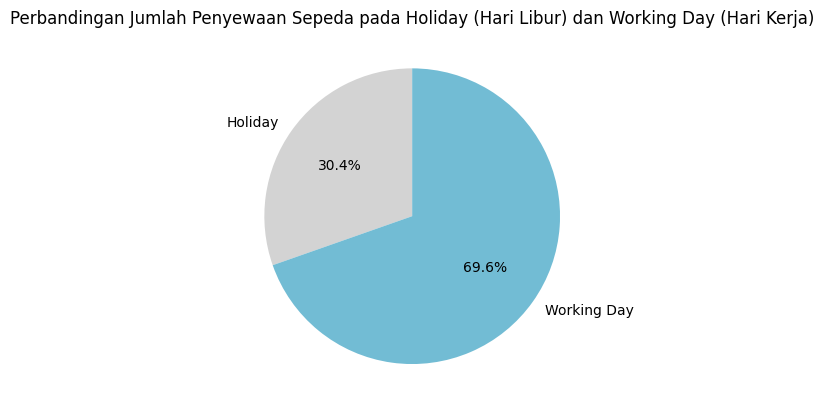

In [33]:
# Membuat pie chart untuk melihat perbandingan jumlah penyewaan sepeda saat working day dan holiday
# Mengelompokkan data berdasarkan workingday dan menjumlahkan jumlah penyewaan sepeda
holiday_vs_workingday = bikeday_df.groupby('workingday')['cnt'].sum()

# Membuat data untuk pie chart
labels = ['Holiday', 'Working Day']
data = [holiday_vs_workingday[0], holiday_vs_workingday[1]]

# Membuat pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"], startangle=90)

plt.title('Perbandingan Jumlah Penyewaan Sepeda pada Holiday (Hari Libur) dan Working Day (Hari Kerja)')
plt.show()


Berdasarkan pie chart tersebut, dapat diketahui bahwa jumlah penyewaan sepeda saat working day lebih banyak dibanding saat holiday, dengan persentase sebesar 69.6%

##Pertanyaan 4: Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?


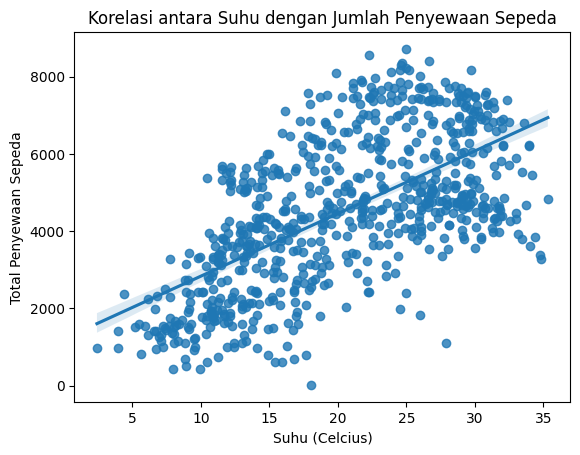

In [35]:
# Membuat scatterplot dengan fungsi regresi untuk menggambarkan korelasi antara suhu dan jumlah penyewaan sepeda
# Mengembalikan suhu ke skala Celcius asli
bikeday_df['temp_actual'] = bikeday_df['temp'] * 41

# Membuat plot regresi
sns.regplot(x=bikeday_df["temp_actual"], y=bikeday_df["cnt"])
plt.title("Korelasi antara Suhu dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu (Celcius)")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()


Berdasarkan hasil visualisasi tersebut, garis biru menunjukkan korelasi (hubungan) sedangkan pita di sekitar garis tersebut menunjukkan confidence level dari hasil regression tersebut. Garis tersebut menunjukkan korelasi positif, karena semakin tinggi nilai suhu, semakin banyak sepeda yang disewakan

##Pertanyaan 5 : Pada musim apa jumlah sepeda yang disewakan paling banyak?


<ipython-input-36-fb9e160759e5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_counts = bikeday_df.groupby(by=["season", "yr"]).agg({
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


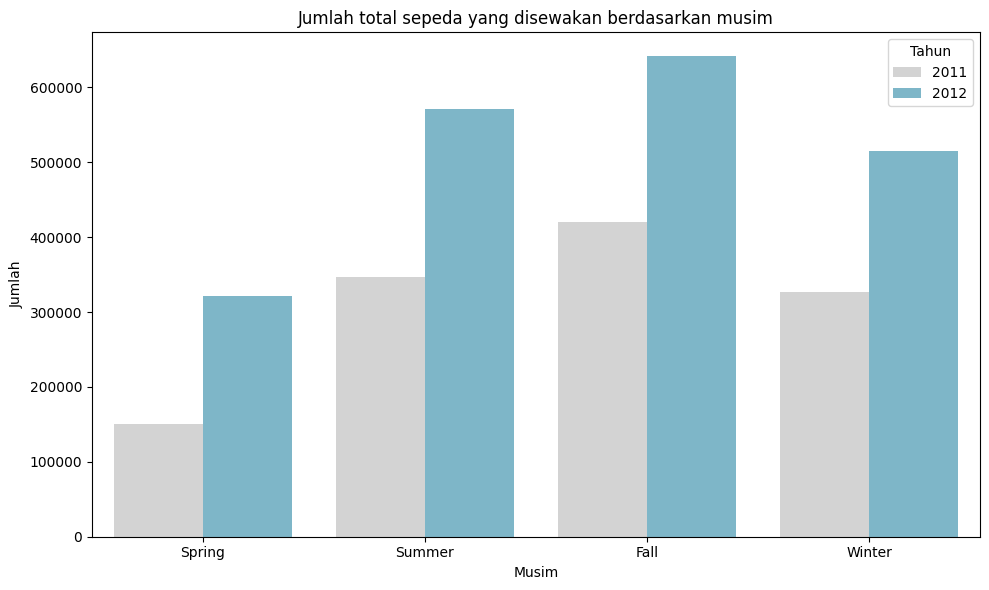

In [36]:
# Membuat diagram batang untuk melihat jumlah sepeda yang disewakan paling banyak berdasarkan musim di tiap tahunnya
# Menghitung jumlah total penyewaan sepeda berdasarkan musim dan tahun
season_counts = bikeday_df.groupby(by=["season", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

# Membuat diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(data=season_counts, x="season", y="cnt", hue="yr", palette=["#D3D3D3", "#72BCD4"])

plt.ylabel("Jumlah")
plt.xlabel("Musim")
plt.title("Jumlah total sepeda yang disewakan berdasarkan musim")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()


Berdasarkan clustered bar chart tersebut, warna abu-abu menunjukkan jumlah total sepeda yang disewakan pada tahun 2011 dan warna biru menunjukkan jumlah total sepeda yang disewakan pada tahun 2012. Penyewaan sepeda terbanyak terjadi pada musim 'Fall' baik di tahun 2011 maupun tahun 2012

#Analisis Lanjutan (Clustering by Manual Grouping)

In [37]:
# Mengkategorikan jenis penyewa berdasarkan waktu penyewaan sepeda
def categorize_time(hour):
    if 5 <= hour <= 11:
        return 'Morning Riders'
    elif 12 <= hour <= 17:
        return 'Afternoon Riders'
    elif 18 <= hour <= 23:
        return 'Evening Riders'
    else:
        return 'Night Riders'

# Menambahkan kolom baru untuk kategori jenis penyewa
bikehour_df['jenis_penyewa'] = bikehour_df['hr'].apply(categorize_time)
bikehour_df


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,jenis_penyewa
0,1,2011-01-01,Spring,2011,Jan,0,Not Holiday,Saturday,Holiday,Clear,0.24,0.2879,0.81,0.0000,3,13,16,Night Riders
1,2,2011-01-01,Spring,2011,Jan,1,Not Holiday,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0000,8,32,40,Night Riders
2,3,2011-01-01,Spring,2011,Jan,2,Not Holiday,Saturday,Holiday,Clear,0.22,0.2727,0.80,0.0000,5,27,32,Night Riders
3,4,2011-01-01,Spring,2011,Jan,3,Not Holiday,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0000,3,10,13,Night Riders
4,5,2011-01-01,Spring,2011,Jan,4,Not Holiday,Saturday,Holiday,Clear,0.24,0.2879,0.75,0.0000,0,1,1,Night Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Dec,19,Not Holiday,Monday,Working Day,Mist,0.26,0.2576,0.60,0.1642,11,108,119,Evening Riders
17375,17376,2012-12-31,Spring,2012,Dec,20,Not Holiday,Monday,Working Day,Mist,0.26,0.2576,0.60,0.1642,8,81,89,Evening Riders
17376,17377,2012-12-31,Spring,2012,Dec,21,Not Holiday,Monday,Working Day,Clear,0.26,0.2576,0.60,0.1642,7,83,90,Evening Riders
17377,17378,2012-12-31,Spring,2012,Dec,22,Not Holiday,Monday,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61,Evening Riders


In [38]:
bikehour_df.groupby(by="jenis_penyewa").agg({
    "cnt": ["count"]})

,cnt
,count
jenis_penyewa,
Afternoon Riders,4375
Evening Riders,4368
Morning Riders,5077
Night Riders,3559


Berdasarkan informasi tersebut, dapat diketahui bahwa jenis penyewa paling banayak yaitu "Morning Riders", yaitu seseorang yang menyewa sepeda pada kisaran jam 5-11

#Conclusion



1.   Pada tahun 2011 terjadi kenaikan jumlah penyewaan sepeda dari bulan Januari hingga mencapai puncak pada bulan Juni. Namun, setelah bulan Juni, terdapat penurunan yang signifikan hingga bulan Desember. Sementara itu, pada tahun 2012, jumlah penyewaan sepeda meningkat drastis pada bulan Maret dan mencapai puncaknya pada bulan September.
2.   Pola distribusi penyewaan sepeda bervariasi sepanjang hari. Pada waktu tengah malam hingga pagi hari (0 hingga 5), jumlah penyewaan sepeda sangat rendah. Namun, penyewaan mulai meningkat saat jam 6 dan mencapai puncaknya pada jam 17
1.    Jumlah penyewaan sepeda saat hari kerja lebih banyak dibandingkan saat hari libur, dengan persentase sebesar 69.6%.
2.   Suhu dan jumlah penyewaan sepeda memiliki korelasi positif, yang artinya semakin tinggi suhunya, semakin banyak sepeda yang disewakan.
1.   Jumlah sepeda yang disewakan paling banyak terjadi pada musim "Fall"







In [40]:
# Menyimpan dataset yang sudah dibersihkan
bikeday_df.to_csv("bike_day.csv", index=False)
bikehour_df.to_csv("bike_hour.csv", index=False)